In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from scipy import ndimage as ndi
from skimage.morphology import watershed,disk
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift
from skimage import color,data,filters
from PIL import Image

In [2]:
size = 100, 100

In [3]:
def contrast_stretching(img_I):
    c = np.amin(img_I) # minimum pixel value occuring in image Input
    d = np.amax(img_I) # maximum pixel value occuring in image Input
    a = 0 # minimum pixel value allowed for an input image
    b = 255 # minimum pixel value allowed for an input image
    img_O = (img_I-c*np.ones(img_I.shape,np.uint8))*((b-a)/(d-c))+a 
    return (img_O)

# Show image
def show_img(img):
    fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
    img_plot = plt.imshow(img.astype('uint8'))
    plt.show()

In [46]:
img = Image.open("coins.png")
img.thumbnail(size)
img = np.array(img)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
gray = cv2.normalize(gray,None,0,255,norm_type=cv2.NORM_MINMAX)
thresh,img_bw = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

In [47]:
distance = ndi.distance_transform_edt(img_bw)
local_max = peak_local_max(distance,indices=False,footprint=np.ones((3,3)),labels=img_bw)
markers = ndi.label(local_max)[0]
ws_labels = watershed(-distance,markers,mask=img_bw)

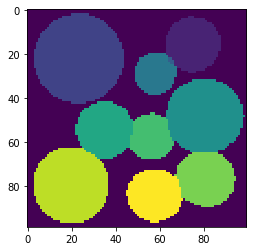

In [48]:
plt.imshow(ws_labels)